### THIS IS THE EXPLORATORY DATA ANALYSIS PROJECT ON THE STUDENT'S PERFORMANCE DATASET.


#### 1.IMPORTING THE NECESSARY LIBRARIES OR PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns

#### 2.STORING THE DATA GIVEN TO US TO A DATAFRAME IN PANDAS

In [2]:
df=pd.read_csv("StudentsPerformance.csv",sep=",")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
import pandas_profiling as pp
pp.ProfileReport(df)

From the above report ,we infer that there are no missing values in the given data and the data has 1000 observations in
total.So lets understand some corellations using graphs and other visualizations

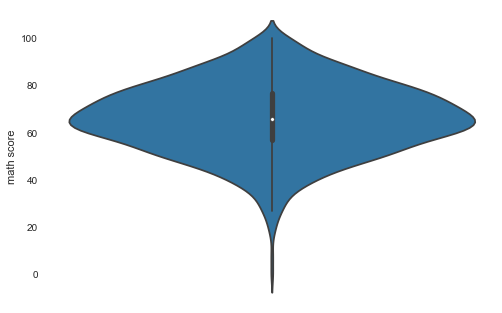

In [7]:
sns.violinplot(y='math score',data=df)
#sns.violinplot(y='reading score',data=df)
#sns.violinplot(y='writing score',data=df)

By analysing the above violinplots,we find that all the numerical data provided to us is well distributed and symmetric in nature.

In [8]:
df[df['gender']=='female'].count()

gender                         518
race/ethnicity                 518
parental level of education    518
lunch                          518
test preparation course        518
math score                     518
reading score                  518
writing score                  518
dtype: int64

So there are 518 female and 482 males in our analysis dataset which is well balanced.

In [9]:
df[(df['gender']=='female') & (df['math score']>80)].count()

gender                         68
race/ethnicity                 68
parental level of education    68
lunch                          68
test preparation course        68
math score                     68
reading score                  68
writing score                  68
dtype: int64

We see that only 68 females have scored above 80 in maths .


In [10]:
df[(df['gender']=='male') & (df['math score']>80)].count()

gender                         108
race/ethnicity                 108
parental level of education    108
lunch                          108
test preparation course        108
math score                     108
reading score                  108
writing score                  108
dtype: int64

We see that  108 males have scored above 80 in maths .This shows that males had a better understanding of maths than females.

Text(0.5, 1.0, 'GENDER VS MATH SCORE')

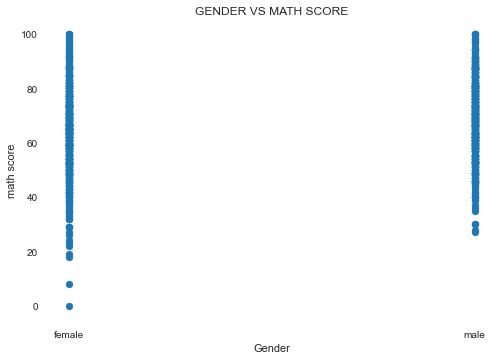

In [11]:
mat.scatter(df['gender'],df['math score'])
mat.xlabel("Gender")
mat.ylabel("math score")
mat.title("GENDER VS MATH SCORE")

From this above scatter plot ,we find that the least score among males is around 25 wheraes there is a fair number of females in range of 0 to 40.This again proves that on an average,males were good at maths than females.

In [12]:
correlation_df = df.corr()
correlation_df

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


From the corellation score,we find that the reading and writing score are mostly dependent on each other with the corellation factor being 0.95. So a person who scores well in reading also scores well in writing test and vice versa is also true.

Therefore,instead of having two seperate columns or reading score and writing score,we can by feature engineering create a new feature called read_write_score which holds the value of the average of a student's read and write score.

In [13]:
df['read_write_score']=(df['reading score']+df['writing score'])/2

In [14]:
df.drop(columns=["reading score","writing score"],inplace=True)

So as said,we have created a new feature "read_write_score" and now we will compare the dependency of other features on the newly built feature.

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       read_write_score                                                         
                  count       mean        std   min     25%   50%   75%    max  
gender                                                                          
female            518.0  72.537645  14.445256  13.5  63.625  73.0  82.5  100.0  
male              482.0  64.392116  13.848669  19.5  54.125  65.0  75.0  100.0

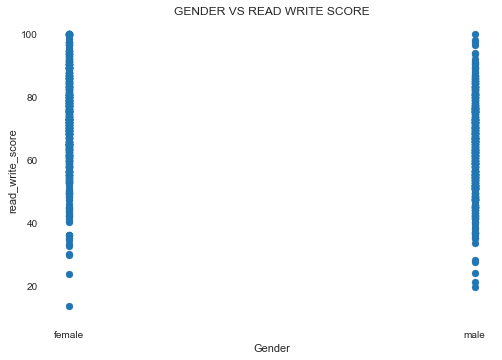

In [15]:
mat.scatter(df['gender'],df['read_write_score'])
mat.xlabel("Gender")
mat.ylabel("read_write_score")
mat.title("GENDER VS READ WRITE SCORE")
gro=df.groupby(df['gender'])
gro.describe()

Text(0.5, 1.0, 'RACE VS READ WRITE SCORE')

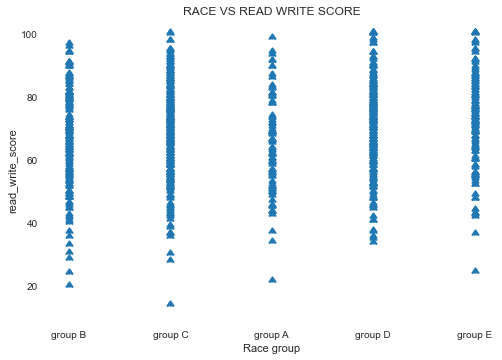

In [16]:
mat.scatter(df['race/ethnicity'],df['read_write_score'],edgecolors="black",marker=10)
mat.xlabel("Race group")
mat.ylabel("read_write_score")
mat.title("RACE VS READ WRITE SCORE")

From the above scatterplot,we find that group D and group E have a consistent performance above score of 60 than the other groups.In group A,B and C ,we find maximum cases which are below 40 compared to the other groups.

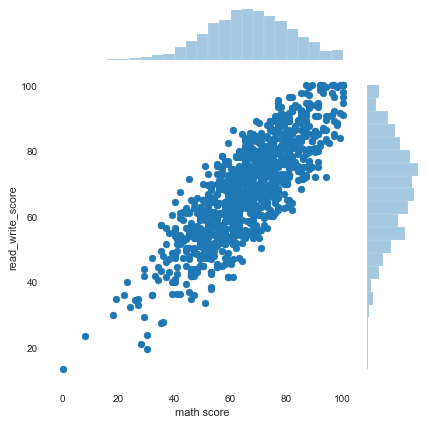

In [17]:
sns.jointplot(x="math score", y="read_write_score", data=df)

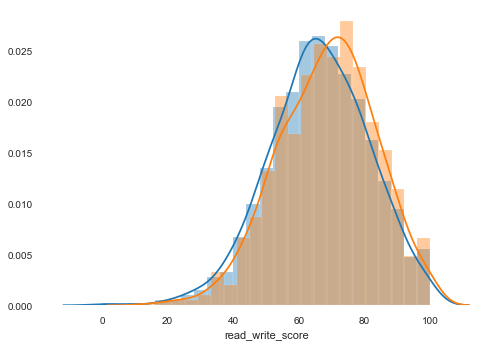

In [18]:
import seaborn as sns
sns.distplot(df['math score'],kde=True)
sns.distplot(df['read_write_score'],kde=True)

The above 2 visualizations show that maximum nuber of students score around 65 in maths as the graph peaks in that region .Similarly,maximum number of students score around 70 in both reading and writing tests.

In [19]:
group=df.groupby(df['race/ethnicity'],axis=0)

In [20]:
print(group.describe())
mean=group.agg(np.mean)

               math score                                                 \
                    count       mean        std   min    25%   50%   75%   
race/ethnicity                                                             
group A              89.0  61.629213  14.523008  28.0  51.00  61.0  71.0   
group B             190.0  63.452632  15.468191   8.0  54.00  63.0  74.0   
group C             319.0  64.463950  14.852666   0.0  55.00  65.0  74.0   
group D             262.0  67.362595  13.769386  26.0  59.00  69.0  77.0   
group E             140.0  73.821429  15.534259  30.0  64.75  74.5  85.0   

                      read_write_score                                      \
                  max            count       mean        std   min     25%   
race/ethnicity                                                               
group A         100.0             89.0  63.674157  15.320274  21.0  51.500   
group B          97.0            190.0  66.476316  15.263149  19.5  56.000   
g

In [21]:
mean

,math score,read_write_score
race/ethnicity,,
group A,61.629213,63.674157
group B,63.452632,66.476316
group C,64.463950,68.465517
group D,67.362595,70.087786
group E,73.821429,72.217857


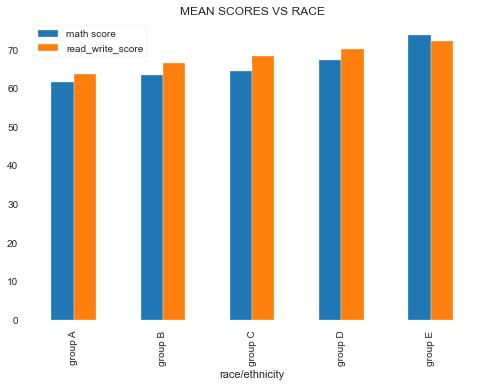

In [22]:
mean[['math score','read_write_score']].plot(kind="bar",title="MEAN SCORES VS RACE")


From the above bar plot ,we find that Group E performs better in both maths as well as reading and writing exams.Group E is followed by D,C,B,A.But there are much students in Group E who underperform as well when compared to Group D because the standard deviation of group E is greater than group D.
Therefore group D has students who have consistency and dont score low.

In [23]:
group1=df.groupby(df['parental level of education'],axis=0)

In [24]:
group1.describe()

math score                                     \
                                 count       mean        std   min    25%   
parental level of education                                                 
associate's degree               222.0  67.882883  15.112093  26.0  57.00   
bachelor's degree                118.0  69.389831  14.943789  29.0  61.00   
high school                      196.0  62.137755  14.539651   8.0  53.75   
master's degree                   59.0  69.745763  15.153915  40.0  55.50   
some college                     226.0  67.128319  14.312897  19.0  59.00   
some high school                 179.0  63.497207  15.927989   0.0  53.00   

                                               read_write_score             \
                              50%   75%    max            count       mean   
parental level of education                                                  
associate's degree           67.0  80.0  100.0            222.0  70.412162   
bachelor's degree            68.0  79.0  100.0            118.0  73.190678   
high school                  63.0  72.0   99.0            196.0  63.576531   
master's degree              73.0  81.0   95.0             59.0  75.525424   
some college                 67.5  76.0  100.0            226.0  69.150442   
some high school             65.0  74.0   97.0            179.0  65.913408   

                                                                            
                                   std   min     25%    50%     75%    max  
parental level of education                                                 
associate's degree           13.916613  34.5  59.500  71.75  80.000  100.0  
bachelor's degree            14.376191  40.0  63.500  73.00  82.750  100.0  
high school                  13.922008  19.5  53.375  65.50  73.125   99.5  
master's degree              13.554304  44.0  66.250  76.00  85.750  100.0  
some college                 14.370013  21.0  60.125  70.25  79.375   99.5  
some high school             15.442428  13.5  55.500  67.00  78.250  100.0

It is very clear from the above table that the children whose parents are well qualified are scoring better in all the 3 subjects.The order of well qualified being(masters > bachelor's > associate's > college > some high school > high school).The marks scored also follows the same decreasing pattern.
The main inference was that parents who were well qualified could help their children in learning than the less qualified parents,therefore scores of students are directly proportional to the parent's education.

In [25]:
group2=df.groupby(df["lunch"],axis=0)

([<matplotlib.patches.Wedge at 0x23acb1a6ec8>,
 [Text(0.4839331201369527, 0.9878303170254058, 'free/reduced'),
  Text(-0.5279271410446912, -1.0776330236905227, 'standard')],
 [Text(0.2639635200747015, 0.5388165365593122, '35.5%'),
  Text(-0.3079574989427365, -0.6286192638194716, '64.5%')])

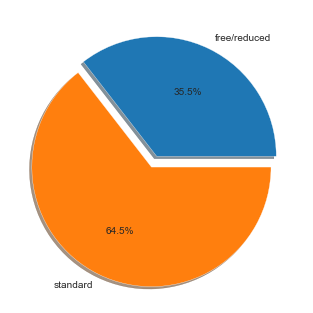

In [26]:
X=list(group2.size())
mat.pie(X,labels=['free/reduced','standard'],shadow= True,
        explode=(0,0.1),
        autopct='%1.1f%%')

This shows that that 355 students recieve free/reduced lunch and the remaining 645 recieve standard lunch.

In [27]:
group2.describe()

math score                                                       \
                  count       mean        std   min   25%   50%   75%    max   
lunch                                                                          
free/reduced      355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0   
standard          645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0   

             read_write_score                                                 \
                        count       mean        std   min   25%   50%    75%   
lunch                                                                          
free/reduced            355.0  63.838028  14.996321  13.5  54.5  64.0  74.75   
standard                645.0  71.238760  13.906449  24.0  62.5  72.0  80.50   

                     
                max  
lunch                
free/reduced  100.0  
standard      100.0

It can be found that students with reduced or free lunch ,students score less compared to students with standard lunch.It can be interpreted that students with lesser facilities score less in all the 3 subjects compared to people with facilities due to some reasons.

Text(0, 0.5, 'math score')

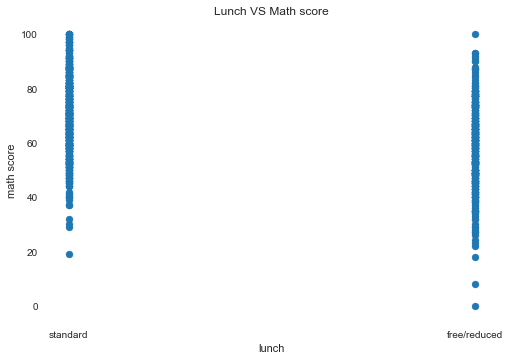

In [28]:
mat.scatter(df['lunch'],df['math score'])
mat.title("Lunch VS Math score")
mat.xlabel("lunch")
mat.ylabel("math score")

This plot above confirms the above made conclusion that students with standard lunch score better

In [29]:
group3=df.groupby(df['test preparation course'],axis=0)

In [30]:
group3['test preparation course'].size()

test preparation course
completed    358
none         642
Name: test preparation course, dtype: int64

This shows us that 358 students have taken and successfully completed the course and 642 have not shown interest in any such courses.

In [31]:
mean1=group3.agg(np.mean)

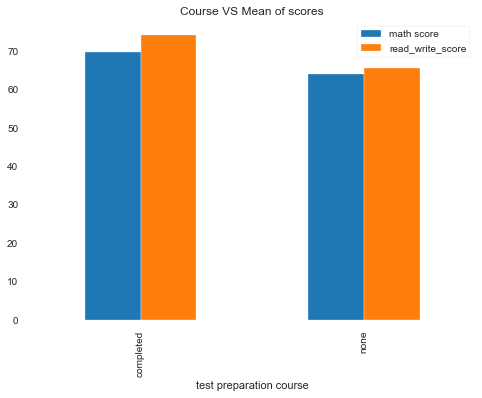

In [32]:
mean1.plot(kind="bar",title="Course VS Mean of scores")

As expected , students who have completed the courses are more likely to score well in Maths as well as in reading and writing tests.But read_write_scores of both kind of students are almost same even though students who have taken the course have benefited only a little by the course. 

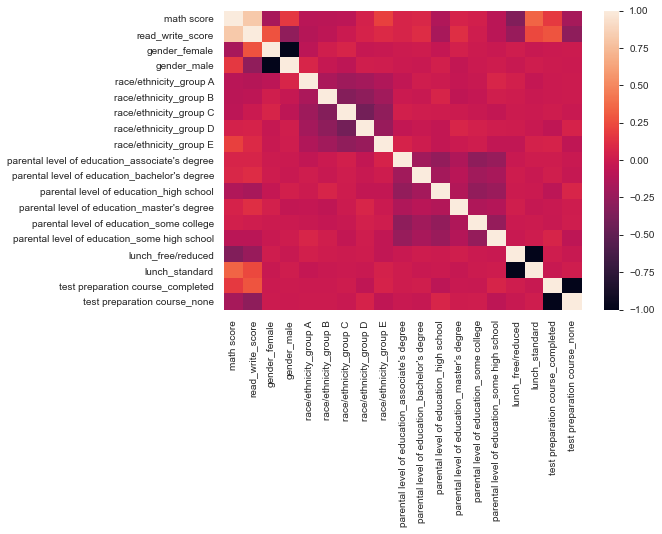

In [33]:
df1=pd.get_dummies(df)
sns.heatmap(df1.corr())

## CONCLUSIONS.

1.Females perform well in reading and writing tests and males perform well in maths test.

2.It was found that group E and D proved superior than ther groups in order(E>D>C>B>A).

3.We infered that students whose parents hold a higher qualification perform better in all the exams.(masters>bachelor's>associate's>college>high school>some high school).

4.Students who recieved standard lunch performed better than free/reduced lunch provided students.

5.Students who took a test course and completed it successfully got bettre grades than the students who did not take them.

# THANK YOU